In [1]:
import lmfit

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
f_N = 7850

def red_noise(params, f):
    A2 = params['A2'].value
    W2 = params['W2'].value
    f_k = params['f_k'].value
    alpha = params['alpha'].value
    f_c = params['f_c'].value
    return W2 * (1 + (f_k / f)**alpha) / (1 + (f / f_c)**2) + A2


def aliased_red_noise(params, f):
    f_N = params['f_N'].value
    return red_noise(params, f) + red_noise(params, 2 * f_N - f)


def parameters(A2=1e-18, W2=1e-18, f_k=10, alpha=1, f_c=1e3, f_N=7850):
    p = lmfit.Parameters()
    p.add('A2', value=A2, min=0)
    p.add('W2', value=W2, min=0)
    p.add('f_k', value=f_k, min=0)
    p.add('alpha', value=alpha, min=0)
    p.add('f_c', value=f_c, min=0)
    p.add('f_N', value=f_N, vary=False)
    return p

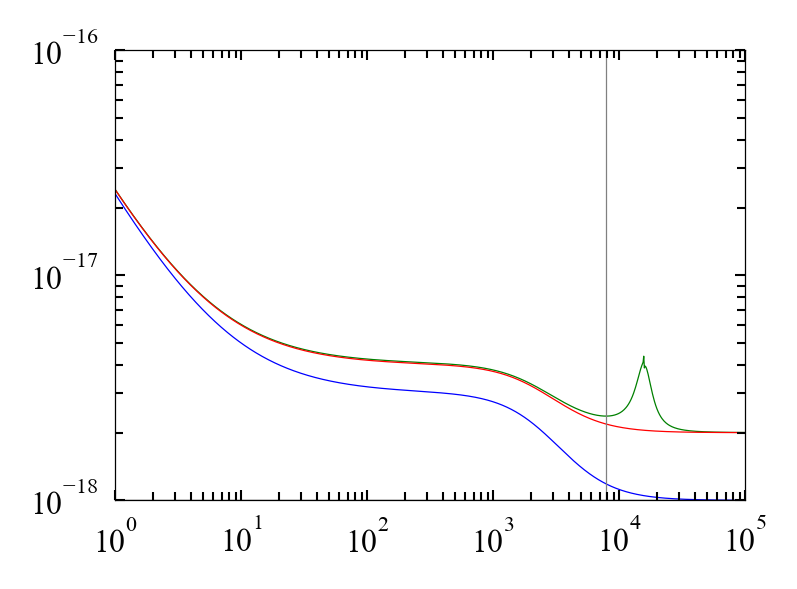

In [13]:
f_c = 2.5e3
W2 = 2e-18
p = parameters(W2=W2, f_c=f_c)
f = np.logspace(0, 5, 1e3)

fig, ax = plt.subplots()
ax.plot(f, red_noise(p, f))
ax.plot(f, aliased_red_noise(p, f))
ax.plot(f, red_noise(parameters(W2=W2, A2=W2, f_c=f_c), f))
ax.axvline(p['f_N'].value, color='gray')
ax.axhline(p['A2'].value, color='black')
ax.set_xscale('log')
ax.set_yscale('log');
#ax.set_xlim(1e3, 1e4)
#ax.set_ylim(0, 1e-17);